# Exercise 1

Make the required imports by the notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy import units as u
plt.ion()

Create a list with randomly chosen numbers and calculate their mean value using the numpy package.

In [3]:
a = [23, 56, 2, 4, 3]
b= np.mean(a)
print(b)

17.6


Read the **hst_results_nd.fits** file using astropy and print its columns

In [4]:
t = Table.read("./data/hst_results_nd.fits")

for c in t.columns:
    print(c)

Name
RA
DEC
HST_WFC3_F225W
HST_WFC3_F275W
HST_WFC3_F336W
HST_WFC3_F475W
HST_WFC3_F814W
HST_WFC3_F110W
HST_WFC3_F160W
Av_Best
Av_Exp
Av_p16
Av_p50
Av_p84
Rv_Best
Rv_Exp
Rv_p16
Rv_p50
Rv_p84
Rv_A_Best
Rv_A_Exp
Rv_A_p16
Rv_A_p50
Rv_A_p84
f_A_Best
f_A_Exp
f_A_p16
f_A_p50
f_A_p84
distance_Best
distance_Exp
distance_p16
distance_p50
distance_p84
radius_Best
radius_Exp
radius_p16
radius_p50
radius_p84
logL_Best
logL_Exp
logL_p16
logL_p50
logL_p84
logg_Best
logg_Exp
logg_p16
logg_p50
logg_p84
mbolmag_Best
mbolmag_Exp
mbolmag_p16
mbolmag_p50
mbolmag_p84
logA_Best
logA_Exp
logA_p16
logA_p50
logA_p84
logT_Best
logT_Exp
logT_p16
logT_p50
logT_p84
M_ini_Best
M_ini_Exp
M_ini_p16
M_ini_p50
M_ini_p84
M_act_Best
M_act_Exp
M_act_p16
M_act_p50
M_act_p84
Z_Best
Z_Exp
Z_p16
Z_p50
Z_p84
logHST_WFC3_F225W_nd_Best
logHST_WFC3_F225W_nd_Exp
logHST_WFC3_F225W_nd_p16
logHST_WFC3_F225W_nd_p50
logHST_WFC3_F225W_nd_p84
logHST_WFC3_F275W_nd_Best
logHST_WFC3_F275W_nd_Exp
logHST_WFC3_F275W_nd_p16
logHST_WFC3_F275W_nd_p

Select columns from the fits file and store them in the corresponding variables.

In [5]:
ra = t["RA"]
dec = t["DEC"]
av = t["Av_p50"]
age = t["logA_p50"]
mass = t["M_ini_p50"]
temp = t["logT_p50"]
f475w = t["F475W_VEGA"]
f814w = t["F814W_VEGA"]
#t[0].colnames

Select **young_stars** to be the stars with age less than _8.5_ and **old_stars** to be the stars with age greater than _10_.

Print the size of the two lists of stars.

Plot all stars, **young_stars** and **old_stars**, where on the x axis is the difference between the filter 475 and filter 814 (color index) normalized with Vega and on the y axis is the filter 475 normalized with Vega (luminosity in the given filter).

Add a legend.

Save the file to **cmd_by_age.pdf**

44
170


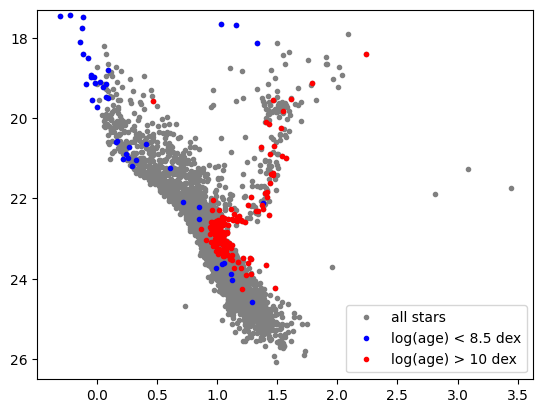

In [6]:
young_stars = t[age < 8.5]
old_stars = t[age > 10]
print(len(young_stars))
print(len(old_stars))
plt.figure()
plt.plot(f475w - f814w, f475w, '.', color='gray', ls='', label='all stars')
plt.ylim(26.5, 17.3)
plt.plot(young_stars["F475W_VEGA"] - young_stars["F814W_VEGA"], young_stars["F475W_VEGA"], 
         'b.', ls='', label='log(age) < 8.5 dex')
plt.plot(old_stars["F475W_VEGA"] - old_stars["F814W_VEGA"], old_stars["F475W_VEGA"], 
         'r.', ls='', label='log(age) > 10 dex')
plt.legend()
plt.savefig("./dist/cmd_by_age.pdf")

Plot the dust extinction in the square using the RA and DEC coordinates.

For this purpose use scatter plot with a colorbar next to the plot.

Save the file in **lmc_av_spatial.pdf**

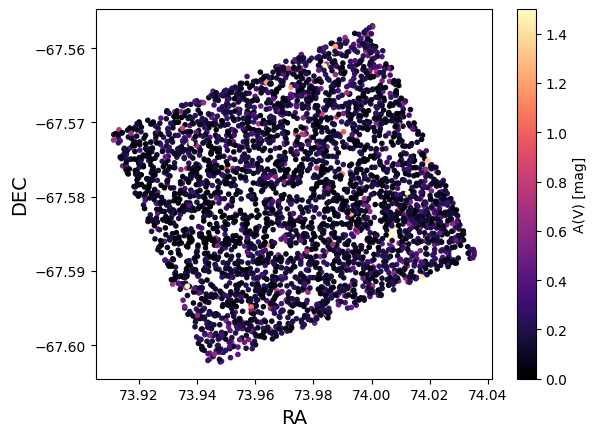

In [7]:
plt.figure()
# A(V) max = 5, -> limit to 1.5
cb = plt.scatter(ra, dec, c=av, marker='.', cmap='magma', vmin=0, vmax=1.5)
plt.colorbar(cb, label='A(V) [mag]')
plt.xlabel("RA", fontsize=14)
plt.ylabel("DEC", fontsize=14)
plt.savefig("./dist/lmc_av_spatial.pdf")

Store the predicted distance in the variable **dist**

In [9]:
dist=t["distance_p50"]

Create a histogram of the distances to the stars in kpc. Use 25 bins for the histogram.

Set the appropriate labels on the x and y axes.

Calculate the mean distance, again in kpc, and plot it as vertical line atop of the histogram.

Save the figure to **lmc_dist_hist.pdf**


49.806221103883765


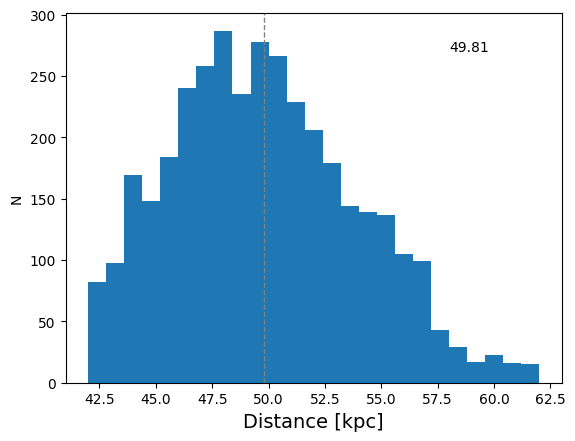

In [10]:
plt.figure()
plt.hist(dist/1000, bins=25)
plt.xlabel("Distance [kpc]", fontsize=14)
plt.ylabel("N")
d_mean = np.mean(dist/1000)
print(d_mean)
plt.axvline(d_mean, color='gray', ls='--', lw=1)
plt.text(58, 270, '%s' % np.around(d_mean, decimals=2))
plt.savefig("./images/lmc_dist_hist.pdf")

Read an astropy table with the data from Scylla survey into the variable **cat**.

In [13]:
f = "./data/hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits"
cat = Table.read(f)

Select the 475 and 814 wavelength fluxes normalized to Vega.

In [14]:
#t[0].colnames
f475 = cat["F475W_VEGA"]
f814 = cat["F814W_VEGA"]

Create a Herzprung-Russel diagram by plotting on the x-axis the color index between f475 - f814 and on the y-axis the flux in f475.

Use blue color, no line style and smaller markers on the plot.

Set the limits ti be between *x* $\in$ *[-3, 6]* and *y* $\in$ *[30, 17]*.

Note that the y-axis is reversed.

Set the corresponding lables on x and y axes and the title of the figure.

Save the figure to **cmd_lmc4.png**


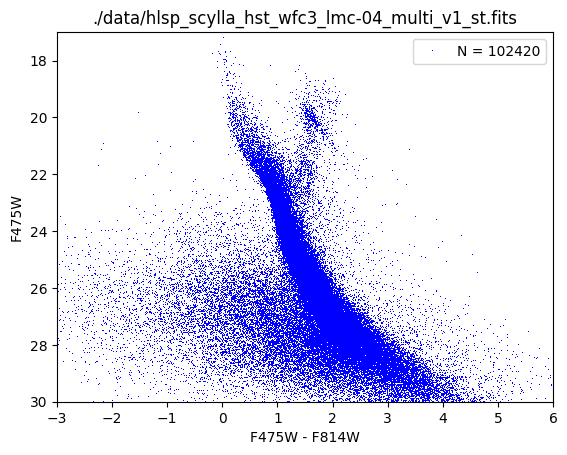

In [15]:
col = f475 - f814
mag = f475
n = len(f475)
# TODO: make a correction of n

plt.figure()
plt.plot(col, mag, ',b', ls='', label='N = %s' % n)
plt.legend()
plt.xlim(-3,6)
plt.ylim(30, 17)
plt.xlabel('F475W - F814W')
plt.ylabel('F475W')
plt.title('%s' % f)
plt.savefig("./images/cmd_lmc4.png")